In [1]:
import sys
sys.path.insert(0, "scripts")

start = datetime.date(2021, 1, 1)
end = datetime.date(2021, 2,1)
lb = load_bars(start, end, 1)
lb.tail()

open       high        low      close  \
date       asset                                                     
2021-01-26 000001.XSHE  22.299999  23.320000  22.299999  22.370001   
2021-01-27 000001.XSHE  22.309999  23.469999  22.309999  23.080000   
2021-01-28 000001.XSHE  22.780001  23.180000  22.450001  22.809999   
2021-01-29 000001.XSHE  22.809999  23.540001  22.709999  23.090000   
2021-02-01 000001.XSHE  23.000000  24.990000  22.700001  24.549999   

                             volume        amount      price  
date       asset                                              
2021-01-26 000001.XSHE  112672055.0  2.558576e+09  22.309999  
2021-01-27 000001.XSHE  129415272.0  2.976801e+09  22.780001  
2021-01-28 000001.XSHE   85747696.0  1.948881e+09  22.809999  
2021-01-29 000001.XSHE  124025841.0  2.864101e+09  23.000000  
2021-02-01 000001.XSHE  147523930.0  3.529557e+09        NaN

In [2]:
lbt = load_bars_tushare(start, end, ["000001.XSHE"])
lbt.tail()

open   high    low  close      volume  \
date                    asset                                                 
1970-01-01 05:36:50.126 000001.XSHE  22.30  23.32  22.30  22.37  1126720.55   
1970-01-01 05:36:50.127 000001.XSHE  22.31  23.47  22.31  23.08  1294152.72   
1970-01-01 05:36:50.128 000001.XSHE  22.78  23.18  22.45  22.81   857476.96   
1970-01-01 05:36:50.129 000001.XSHE  22.81  23.54  22.71  23.09  1240258.41   
1970-01-01 05:36:50.201 000001.XSHE  23.00  24.99  22.70  24.55  1475239.30   

                                          amount  price  
date                    asset                            
1970-01-01 05:36:50.126 000001.XSHE  2558575.511  22.31  
1970-01-01 05:36:50.127 000001.XSHE  2976800.955  22.78  
1970-01-01 05:36:50.128 000001.XSHE  1948881.146  22.81  
1970-01-01 05:36:50.129 000001.XSHE  2864101.419  23.00  
1970-01-01 05:36:50.201 000001.XSHE  3529556.986    NaN

In [5]:
lbt.compare(lb)

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

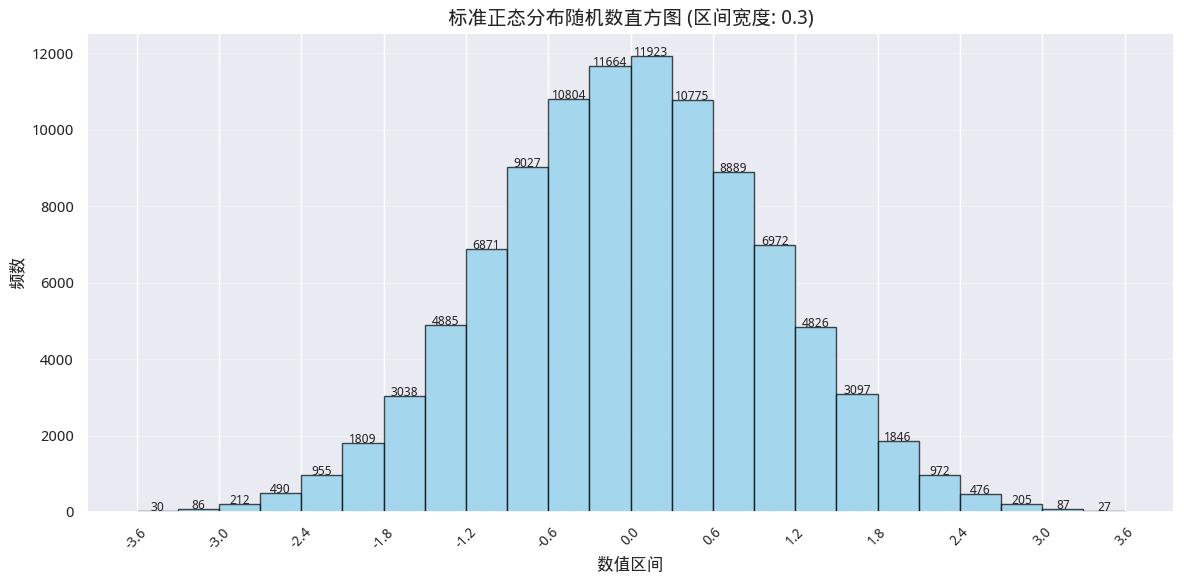

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设置中文显示
plt.rcParams["font.family"] = ["WenQuanYi Micro Hei"]
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

def plot_normal_histogram(sample_size=100, bin_width=0.3, x_range=(-3.6, 3.6), 
                          seed=42, show_counts=True):
    """
    绘制标准正态分布随机样本的直方图
    
    参数:
    sample_size: 样本数量
    bin_width: 区间宽度
    x_range: 元组，指定x轴范围 (start, end)
    seed: 随机种子，用于结果复现
    show_counts: 是否在柱子上方显示频数
    """
    # 生成标准正态分布随机数
    np.random.seed(seed)
    X = norm.rvs(size=sample_size)
    
    # 生成区间分割点
    start, end = x_range
    bins = np.arange(start, end + bin_width, bin_width)
    
    # 创建画布
    plt.figure(figsize=(12, 6))
    
    # 绘制直方图
    n, bins, patches = plt.hist(
        X, 
        bins=bins, 
        edgecolor='black', 
        alpha=0.7, 
        color='skyblue'
    )
    
    # 添加标题和标签
    plt.title(f'标准正态分布随机数直方图 (区间宽度: {bin_width})', fontsize=14)
    plt.xlabel('数值区间', fontsize=12)
    plt.ylabel('频数', fontsize=12)
    
    # 设置x轴刻度
    # 为避免刻度过于密集，根据区间宽度动态调整显示间隔
    tick_interval = 1 if bin_width >= 0.5 else 2 if bin_width >= 0.2 else 3
    plt.xticks(bins[::tick_interval], rotation=45, fontsize=10)
    
    # 添加网格线
    plt.grid(axis='y', alpha=0.3)
    
    # 在每个柱子上方显示频数
    if show_counts:
        for i, count in enumerate(n):
            if count > 0:
                plt.text(
                    bins[i] + bin_width/2, 
                    count + 0.5, 
                    f'{int(count)}', 
                    ha='center', 
                    fontsize=9
                )
    
    plt.tight_layout()
    return plt  # 返回plt对象，方便进一步处理或保存

plot_normal_histogram(sample_size=100_000, bin_width=0.3)
plt.show()


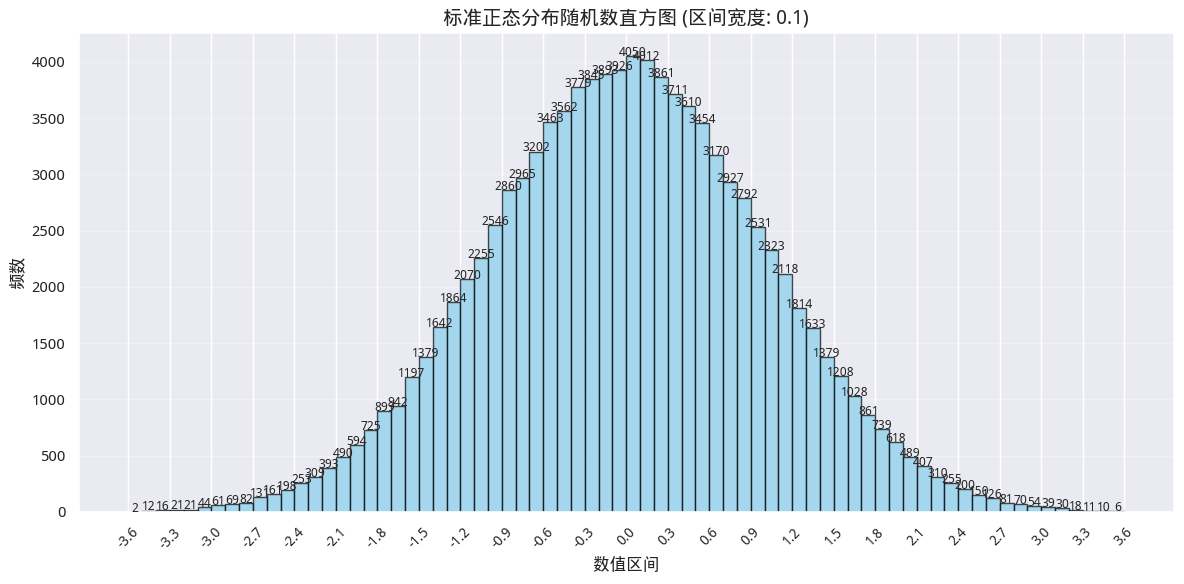

In [13]:
plot_normal_histogram(sample_size=100_000, bin_width=0.1)
plt.show()

In [21]:
import pandas as pd

# 创建数据
data = {
    '序号': [1, 2, 3, 4, 5, 6, 7, 8],
    '结果1': ['H', 'H', 'H', 'H', 'T', 'T', 'T', 'T'],
    '结果2': ['H', 'H', 'T', 'T', 'H', 'H', 'T', 'T'],
    '结果3': ['H', 'T', 'H', 'T', 'H', 'T', 'H', 'T']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 定义高亮函数：有且仅有两个H的行显示为红色
def highlight_two_h(row):
    # 计算每行H的数量（跳过序号列）
    h_count = sum(1 for value in row[1:] if value == 'H')
    return ['color: red' if h_count == 2 else '' for _ in row]

# 应用样式：表头黑底白字，表格宽度加大一倍，符合条件的行红色显示
styled_df = df.style \
    .apply(highlight_two_h, axis=1) \
    .set_table_styles([
        {
            'selector': 'th',  # 表头样式
            'props': [
                ('background-color', 'black'),
                ('color', 'white'),
                ('font-weight', 'bold'),
                ('padding', '10px 20px')  # 增加表头内边距
            ]
        },
        {
            'selector': 'table',  # 表格整体样式
            'props': [
                ('width', '100%'),  # 表格宽度占容器100%
                ('min-width', '800px')  # 最小宽度设置，确保表格足够宽
            ]
        },
        {
            'selector': 'td',  # 单元格样式
            'props': [
                ('padding', '0px 60px'),  # 增加单元格内边距
                ('text-align', 'center')  # 内容居中显示
            ]
        }
    ])

# 显示表格
styled_df
    